In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data=pd.read_csv('environmental factors.csv')
data

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814
...,...,...,...,...,...,...
9995,32.153120,82.622318,24.045509,389.315259,660.200681,96.614073
9996,32.950177,32.808837,19.956484,394.037121,303.574216,37.323996
9997,33.934158,48.221908,5.389117,171.306244,774.095576,30.467486
9998,22.949760,56.599200,13.020097,245.443897,568.909821,40.736253


In [ ]:
data.shape

(10000, 6)

In [ ]:
data.describe()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.883191,60.271793,15.001008,274.421022,547.177425,50.314459
std,5.752603,17.357673,5.735475,130.047566,260.355761,28.834129
min,15.000233,30.009465,5.000962,50.002492,100.015063,0.000843
25%,19.926577,45.236748,10.074958,161.085762,319.845000,25.695648
50%,24.850572,60.353807,15.041362,275.013608,544.345473,50.609039
75%,29.800127,75.388753,19.893477,386.202314,775.429330,75.344597
max,34.994353,89.995490,24.998020,499.905217,999.974933,99.993970


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       10000 non-null  float64
 1   humidity          10000 non-null  float64
 2   wind_speed        10000 non-null  float64
 3   carbon_emissions  10000 non-null  float64
 4   solar_irradiance  10000 non-null  float64
 5   pollution_level   10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


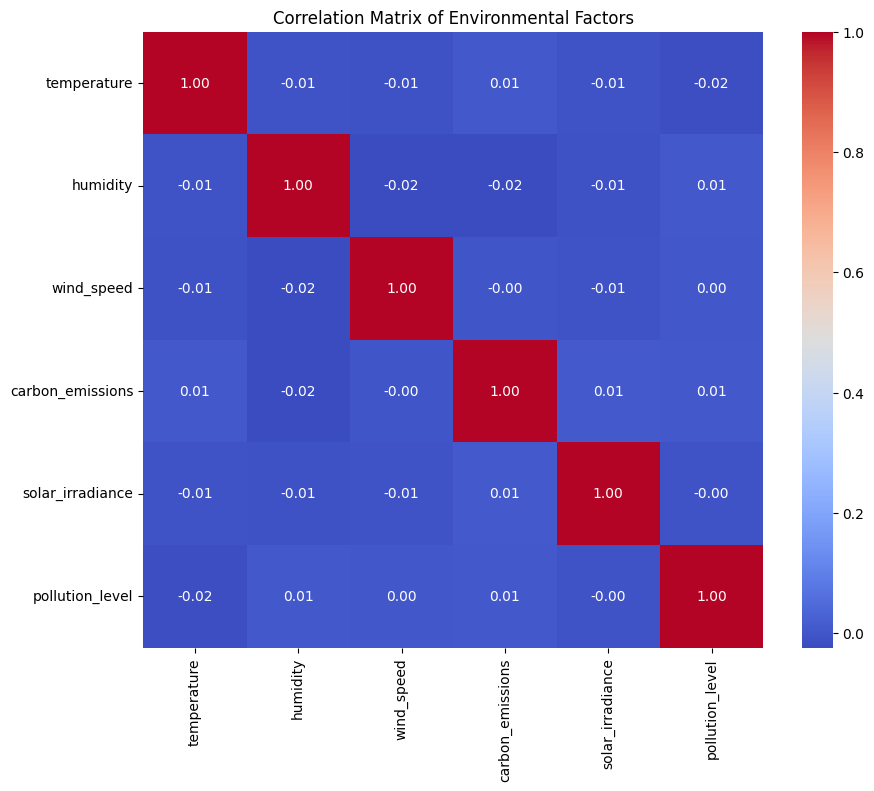

In [ ]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Environmental Factors')
plt.show( )

In [ ]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
carbon_emissions,0
solar_irradiance,0
pollution_level,0


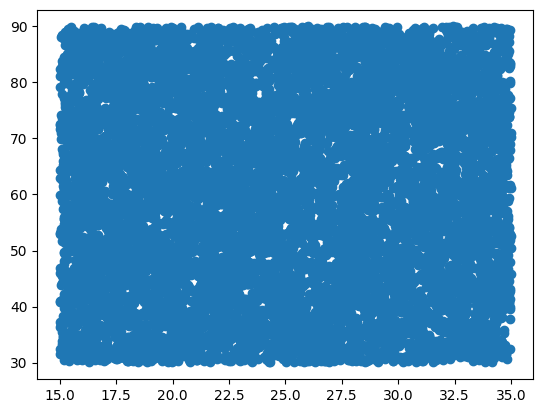

In [ ]:
plt.scatter(data['temperature'],data['humidity'])
plt.show()

In [ ]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   temperature  humidity  ...  solar_irradiance  pollution_level
0    -0.415900 -0.452465  ...         -0.684316         1.193409
1     1.587377 -0.593258  ...         -1.389866        -0.029923
2     0.826917 -1.135149  ...         -1.280827        -1.067119
3     0.363328  0.355146  ...         -1.093072         0.809835
4    -1.175669 -0.096466  ...         -1.013623        -0.292954

[5 rows x 6 columns]


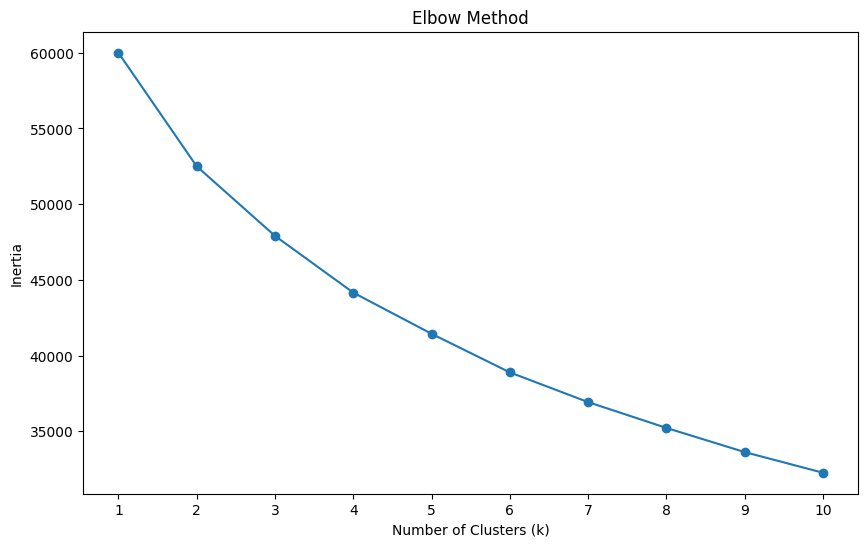

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range) # To show all k values on x-axis
plt.show()

In [ ]:
k=2
kmeans=KMeans(n_clusters=k,random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)
print(data.head())

   temperature   humidity  ...  pollution_level  cluster
0    22.490802  52.418449  ...        84.723658        1
1    34.014286  49.974726  ...        49.451704        0
2    29.639879  40.569235  ...        19.546561        0
3    26.973170  66.436000  ...        73.664179        1
4    18.120373  58.597450  ...        41.867814        0

[5 rows x 7 columns]


In [ ]:
sil_score=silhouette_score(data_scaled,data['cluster'])
print(f'silhouette_score:{sil_score}')

silhouette_score:0.12329174489534976


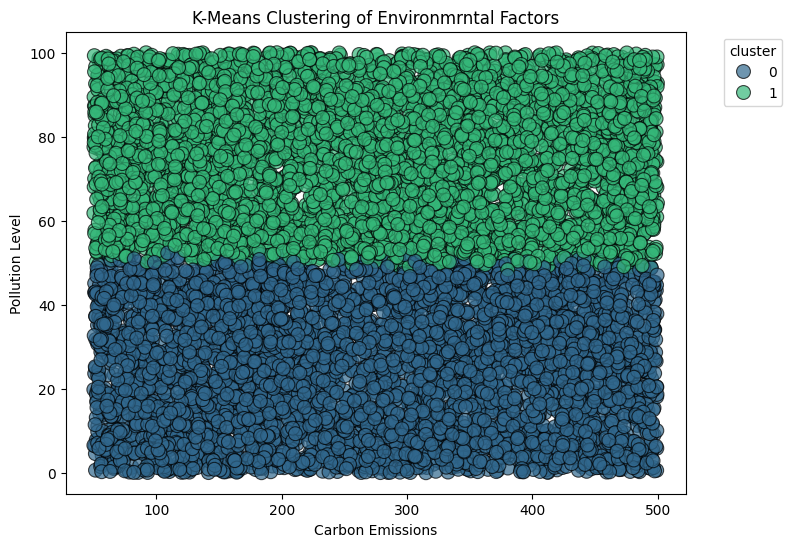

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='carbon_emissions',y='pollution_level',hue='cluster',
                data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('K-Means Clustering of Environmrntal Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()